## MODEL Building (Over sampling dataset)

In [2]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
#importing under sampling dataset
ecommerce_df = pd.read_csv(Path('Resources/Cleaned_data/over_sampling_data.csv'))

In [4]:
#looking the few rows
ecommerce_df.head()

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,32.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,Other,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,1.333333,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,62.750000,0.02,0.05,0.0,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False


In [5]:
ecommerce_df["Revenue"].value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64

In [6]:
#shape of dataframe
ecommerce_df.shape

(20844, 15)

In [7]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=ecommerce_df.drop('Revenue', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=ecommerce_df['Revenue'].values 

In [8]:
# Seperating categorical columns
cat_columns=['Month','OperatingSystems', 'Browser', 'Region',
             'TrafficType','VisitorType','Weekend']

In [9]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X, columns = cat_columns)
print(X_dummies.columns)
X_dummies.head()

Index(['Administrative_Avg', 'Informational_Avg', 'ProductRelated_Avg',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_Other', 'Browser_1', 'Browser_10', 'Browser_2',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_Other', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
       'TrafficType_Other', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,...,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,32.000000,0.00,0.10,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,1.333333,0.05,0.14,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0.0,0.0,62.750000,0.02,0.05,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [10]:
#Total columns before and after one-hot encoding
print(f'Total column before one hot encoding: {X.shape[1]}, Total columns after one hot encoding: {X_dummies.shape[1]}')

Total column before one hot encoding: 14, Total columns after one hot encoding: 53


In [11]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=42)

In [13]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.49176122, -0.26201191, -0.35329174, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [ 2.845514  , -0.12725511,  0.09027359, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.11814113,  0.20739094, -0.17978272, ...,  0.46069117,
         0.56481668, -0.56481668],
       ...,
       [-0.49176122, -0.26201191, -0.06603435, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [-0.30633607, -0.26201191, -0.22378354, ..., -2.17065155,
         0.56481668, -0.56481668],
       [-0.49176122, -0.26201191, -0.39395585, ...,  0.46069117,
         0.56481668, -0.56481668]])

In [14]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.48263956, -0.26201191,  0.08368685, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.49176122, -0.26201191, -0.22028632, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.49176122,  6.04385761,  0.8350282 , ...,  0.46069117,
        -1.77048594,  1.77048594],
       ...,
       [-0.49176122, -0.26201191, -0.7231451 , ..., -2.17065155,
        -1.77048594,  1.77048594],
       [ 0.04417273,  1.07183085, -0.17184811, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [-0.49176122, -0.26201191, -0.60712615, ..., -2.17065155,
         0.56481668, -0.56481668]])

In [15]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("******************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("************Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("******Confusion Matrix using cross_val_predict****")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("***********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3,
                                    method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)
    
    
    
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("********************Train Score******************")
    print(train_score)
    print()

    print("*********************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("**************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("**********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)


## Model 1: Stochastic Gradent Descent Classifier

In [19]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log', penalty='l2')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

******************Train Score******************
0.8096334676645558

************Using K=3 cross validation**********
[0.8025331  0.80656304 0.80694684]

******Confusion Matrix using cross_val_predict****
[[6472 1310]
 [1733 6118]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7782
           1       0.82      0.78      0.80      7851

    accuracy                           0.81     15633
   macro avg       0.81      0.81      0.81     15633
weighted avg       0.81      0.81      0.81     15633


ROC Curve


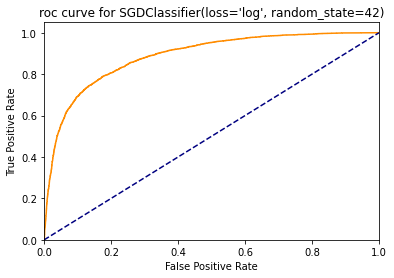


**************Area under the curve******************
0.8867596009865184


In [20]:
#score for logistic regression using only training data
train_score(sgd)

### Tuning hyperparamaters using Grid Search CV for Stochastic Gradent Descent Classifier

In [21]:
#### Using GridSearchCV
param_grid_sgd = {
              'penalty': ['l1','l2'],
             'loss':['log', 'modified_huber'],
                'max_iter':[500,1000, 2000]}
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, verbose=1, n_jobs=-1)

In [22]:
grid_sgd.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             n_jobs=-1,
             param_grid={'loss': ['log', 'modified_huber'],
                         'max_iter': [500, 1000, 2000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [23]:
# best parameters for this dataset
print(grid_sgd.best_params_)

{'loss': 'log', 'max_iter': 500, 'penalty': 'l1'}


In [24]:
# best score
print(grid_sgd.best_score_)

0.8084180238530898


In [25]:
#best estimator
sgd_b=grid_sgd.best_estimator_
sgd_b

SGDClassifier(loss='log', max_iter=500, penalty='l1', random_state=42)

******************Train Score******************
0.8088658606793322

************Using K=3 cross validation**********
[0.8025331  0.80905776 0.80061409]

******Confusion Matrix using cross_val_predict****
[[6489 1293]
 [1770 6081]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7782
           1       0.82      0.77      0.80      7851

    accuracy                           0.80     15633
   macro avg       0.81      0.80      0.80     15633
weighted avg       0.81      0.80      0.80     15633


ROC Curve


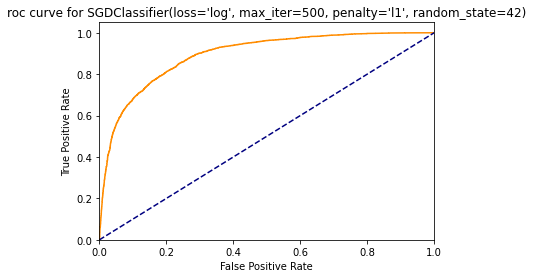


**************Area under the curve******************
0.8918546161135759


In [26]:
#score for Stochastic Gradent Descent Classifier using training data
train_score(sgd_b)

##  Model 2: Logistic Regression

In [29]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

******************Train Score******************
0.8208277361990661

************Using K=3 cross validation**********
[0.82191518 0.81539052 0.81423911]

******Confusion Matrix using cross_val_predict****
[[6605 1177]
 [1681 6170]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7782
           1       0.84      0.79      0.81      7851

    accuracy                           0.82     15633
   macro avg       0.82      0.82      0.82     15633
weighted avg       0.82      0.82      0.82     15633


ROC Curve


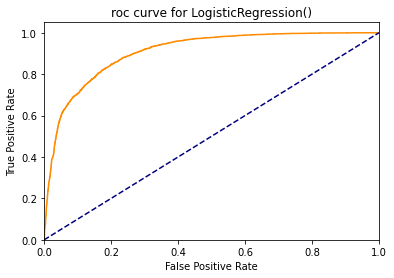


**************Area under the curve******************
0.9065239140937771


In [30]:
#score for logistic regression using only training data
train_score(lr)

### Tuning hyperparamaters  using Grid Search CV for Logistic Regresssion

In [31]:
#### Using GridSearchCV
param_grid_lr = {'C': [0.001, 0.01,0.1,1, 5, 10],
                 'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=1, n_jobs=-1)

In [32]:
grid_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'max_iter': [100, 500, 1000, 10000],
                         'solver': ['lbfgs', 'saga']},
             verbose=1)

In [33]:
# best parameters for this dataset
print(grid_lr.best_params_)

{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [34]:
# best score
print(grid_lr.best_score_)

0.8193556379835012


In [35]:
#best estimator
lr_b=grid_lr.best_estimator_
lr_b

LogisticRegression(C=1)

******************Train Score******************
0.8208277361990661

************Using K=3 cross validation**********
[0.82191518 0.81539052 0.81423911]

******Confusion Matrix using cross_val_predict****
[[6605 1177]
 [1681 6170]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7782
           1       0.84      0.79      0.81      7851

    accuracy                           0.82     15633
   macro avg       0.82      0.82      0.82     15633
weighted avg       0.82      0.82      0.82     15633


ROC Curve


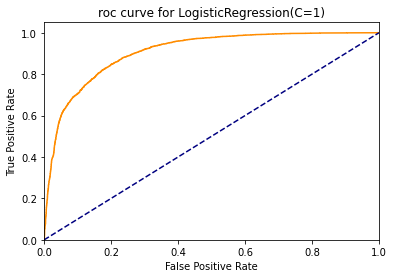


**************Area under the curve******************
0.9065239140937771


In [36]:
#score for logistic regression using training data only after hyperparamater tuining
train_score(lr_b)

## Model 3: Support Vector Classifier

In [39]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

******************Train Score******************
0.8296552165291371

************Using K=3 cross validation**********
[0.83745922 0.82153138 0.82594512]

******Confusion Matrix using cross_val_predict****
[[6803  979]
 [1705 6146]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      7782
           1       0.86      0.78      0.82      7851

    accuracy                           0.83     15633
   macro avg       0.83      0.83      0.83     15633
weighted avg       0.83      0.83      0.83     15633


ROC Curve


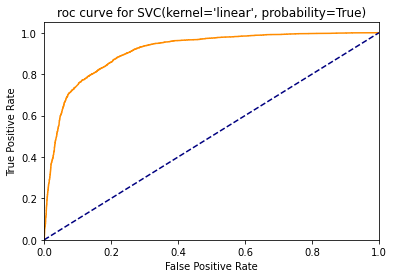


**************Area under the curve******************
0.9119962668226953


In [40]:
#score for support vector classifier using only training data
train_score(svc)

##  Model 4: Decision Tree Classifier

In [16]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.92842065 0.9339858  0.93206678]

******Confusion Matrix using cross_val_predict****
[[6883  899]
 [ 176 7675]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7782
           1       0.90      0.98      0.93      7851

    accuracy                           0.93     15633
   macro avg       0.94      0.93      0.93     15633
weighted avg       0.93      0.93      0.93     15633


ROC Curve


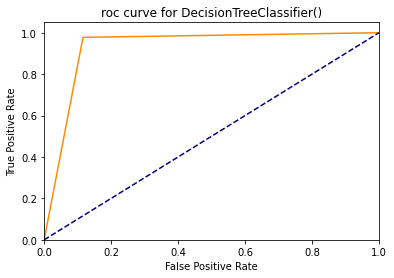


**************Area under the curve******************
0.9309006695344588


In [17]:
#score for Decision Tree using only training data
train_score(dt)

### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [46]:
#### Using GridSearchCV
param_grid_dt = {'criterion': ['gini','entropy'],
             'max_depth':[10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [47]:
grid_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000]},
             verbose=1)

In [48]:
# best parameters for this dataset
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [49]:
# best score
print(grid_dt.best_score_)

0.9278449433889847


In [50]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

DecisionTreeClassifier(max_depth=100, max_features='sqrt')

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.91441182 0.92093648 0.92208789]

******Confusion Matrix using cross_val_predict****
[[6694 1088]
 [ 206 7645]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7782
           1       0.88      0.97      0.92      7851

    accuracy                           0.92     15633
   macro avg       0.92      0.92      0.92     15633
weighted avg       0.92      0.92      0.92     15633


ROC Curve


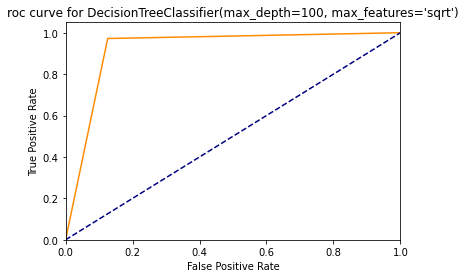


**************Area under the curve******************
0.9231517290962841


In [51]:
#score for decision tree using training data
train_score(dt_b)

##  Model 5: Random Forest Classifier

In [53]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.93974285 0.94358089 0.95010555]

******Confusion Matrix using cross_val_predict****
[[7047  735]
 [ 132 7719]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7782
           1       0.91      0.98      0.95      7851

    accuracy                           0.94     15633
   macro avg       0.95      0.94      0.94     15633
weighted avg       0.95      0.94      0.94     15633


ROC Curve


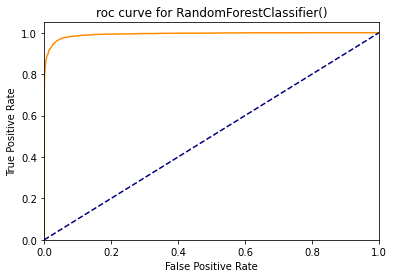


**************Area under the curve******************
0.9930080589582883


In [54]:
#score for Random Forest Classifer using only training data
train_score(rf)

[6.61107747e-02 2.95631169e-02 8.14836988e-02 6.66051921e-02
 1.05623142e-01 3.83208374e-01 5.86148740e-03 3.38000057e-03
 5.99033520e-03 1.29981634e-03 3.65200812e-03 1.94551515e-03
 8.68584364e-03 1.14464128e-02 3.09897613e-02 4.39555096e-03
 5.56843916e-03 5.51827418e-03 7.57457830e-03 8.01279298e-03
 2.99067630e-03 5.03962472e-03 1.53727329e-03 7.75447735e-03
 4.41144262e-03 3.37756063e-03 1.46105794e-03 1.83959994e-03
 1.04916353e-02 5.83280447e-03 8.84650818e-03 5.91089790e-03
 2.51704516e-03 4.74332801e-03 4.63746719e-03 3.67775579e-03
 3.82645698e-03 6.77933147e-03 2.86967519e-03 2.91315015e-03
 3.91070655e-03 1.14984854e-02 7.89940640e-03 4.19002402e-03
 2.43772714e-03 2.65821404e-03 4.96273217e-03 2.86165813e-03
 7.43956762e-03 3.80722406e-04 7.87093402e-03 7.65712182e-03
 7.85981633e-03]


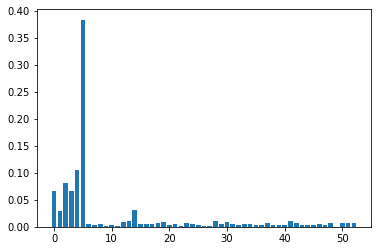

In [55]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [62]:

param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)

In [63]:
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000, 10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [64]:
# best parameters for this dataset
print(grid_rf.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 1000, 'criterion': 'gini'}


In [65]:
# best score
print(grid_rf.best_score_)

0.9095500952327171


In [66]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=200)

******************Train Score******************
0.9502974477067742

************Using K=3 cross validation**********
[0.90289772 0.90328152 0.90635195]

******Confusion Matrix using cross_val_predict****
[[6859  923]
 [ 571 7280]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7782
           1       0.89      0.93      0.91      7851

    accuracy                           0.90     15633
   macro avg       0.91      0.90      0.90     15633
weighted avg       0.91      0.90      0.90     15633


ROC Curve


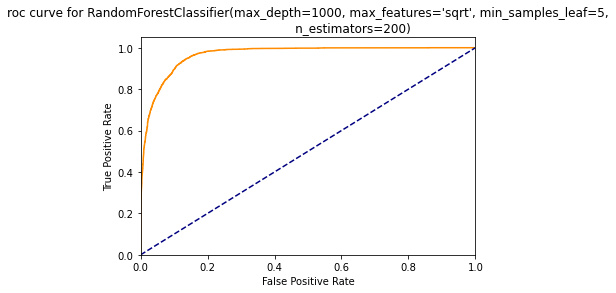


**************Area under the curve******************
0.9662493987788036


In [67]:
#score for random forest using training data
train_score(rf_b)

##  Model 6: Extremely Random Trees


In [70]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.95317597 0.94972174 0.95701401]

******Confusion Matrix using cross_val_predict****
[[7276  506]
 [ 252 7599]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7782
           1       0.94      0.97      0.95      7851

    accuracy                           0.95     15633
   macro avg       0.95      0.95      0.95     15633
weighted avg       0.95      0.95      0.95     15633


ROC Curve


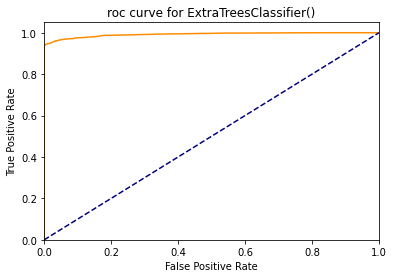


**************Area under the curve******************
0.991873476446647


In [71]:
#score for Extremely Random Trees using only training data
train_score(rt)

[0.06182331 0.04026043 0.06367932 0.06940263 0.11222907 0.24465176
 0.00934061 0.0057077  0.00967007 0.00290077 0.00604098 0.00370308
 0.0110934  0.0114173  0.03237709 0.00698972 0.00706197 0.00844858
 0.01093446 0.01064652 0.00550059 0.00739996 0.00298922 0.01308803
 0.00713513 0.00571777 0.00255904 0.00356279 0.01951731 0.01162239
 0.01546122 0.01287325 0.00485555 0.01019954 0.01005414 0.00707309
 0.00702522 0.00978092 0.00431854 0.00381635 0.00637133 0.01585915
 0.01224853 0.00699637 0.00367723 0.00520295 0.00600164 0.00500257
 0.0101578  0.00048171 0.00943116 0.01302502 0.0126157 ]


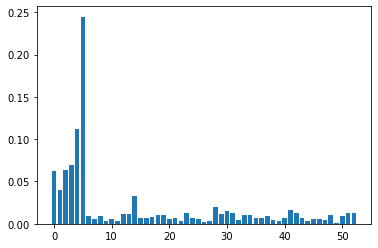

In [72]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [73]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=5, verbose=1, n_jobs=-1)

In [74]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [75]:
# best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10000, 'criterion': 'gini'}


In [76]:
# best score
print(rand_rt.best_score_)

0.8483975143943704


In [77]:
#best estimator
rt_b=rand_rt.best_estimator_
rt_b

ExtraTreesClassifier(max_depth=10000, min_samples_leaf=10, n_estimators=200)

******************Train Score******************
0.8886330198938144

************Using K=3 cross validation**********
[0.83841873 0.84052965 0.84225676]

******Confusion Matrix using cross_val_predict****
[[6168 1614]
 [ 872 6979]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7782
           1       0.81      0.89      0.85      7851

    accuracy                           0.84     15633
   macro avg       0.84      0.84      0.84     15633
weighted avg       0.84      0.84      0.84     15633


ROC Curve


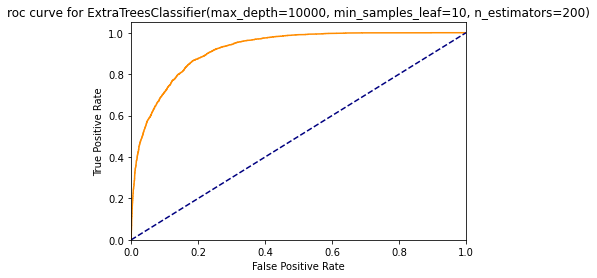


**************Area under the curve******************
0.9192744354740424


In [78]:
#score for extra tree classifier using training data
train_score(rt_b)

##  Model 7: Boosting


In [81]:
# Creating a AdaBoostClassifier model on the scaled data
ab= AdaBoostClassifier(base_estimator = dt)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.93053157 0.933602   0.93283439]

******Confusion Matrix using cross_val_predict****
[[6886  896]
 [ 188 7663]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7782
           1       0.90      0.98      0.93      7851

    accuracy                           0.93     15633
   macro avg       0.93      0.93      0.93     15633
weighted avg       0.93      0.93      0.93     15633


ROC Curve


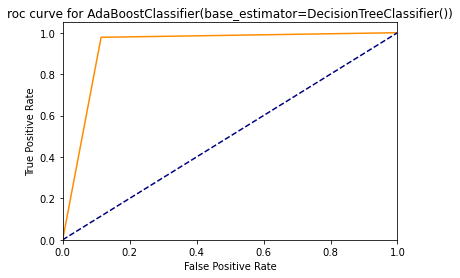


**************Area under the curve******************
0.9315426132064364


In [82]:
#score for adaboost using only training data
train_score(ab)

[5.46144408e-02 2.41879193e-02 6.30878661e-02 5.04460569e-02
 6.42768121e-02 5.18980166e-01 2.66666639e-03 1.19662277e-03
 2.91905923e-03 2.15517244e-04 2.44935816e-03 1.71288942e-03
 5.94971937e-03 4.38483011e-03 5.07200774e-02 1.28026790e-03
 7.99851844e-03 3.87401274e-03 6.34958469e-03 6.20593302e-03
 2.32387407e-03 3.54673208e-03 1.11377887e-03 8.16726766e-03
 6.51856466e-03 5.05552755e-03 1.56347827e-03 8.76350438e-04
 6.53543493e-03 4.52162527e-03 4.24479557e-03 5.12305024e-03
 2.61569335e-03 3.40916913e-03 5.17431242e-03 2.63057437e-03
 3.44393302e-03 7.02024636e-03 5.77753714e-04 3.37162591e-03
 1.78883984e-03 6.28225096e-03 8.85691054e-03 1.93127436e-03
 1.58268586e-03 3.11298079e-03 3.47870051e-03 2.26303566e-03
 7.59329492e-03 0.00000000e+00 4.47399393e-03 2.11652699e-03
 5.16939943e-03]


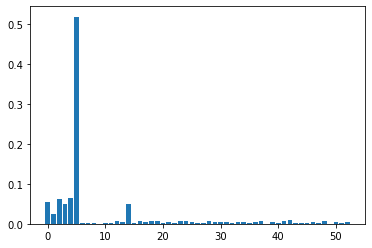

In [83]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for AdaBoostClassifier

In [84]:
#### Using GridSearchCV
param_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.01,0.1]}
rand_ab = RandomizedSearchCV(ab, param_ab, cv=3, verbose=1, n_jobs=-1)

In [85]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': [100, 200, 500, 1000, 2000, 5000]},
             verbose=1)

In [86]:
# best parameters for this dataset
print(rand_ab.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500}


In [87]:
# best score
print(rand_ab.best_score_)

0.9324505853003262


In [88]:
#best estimator
ab_b=rand_ab.best_estimator_
ab_b

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=500)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.92976396 0.93590482 0.93245059]

******Confusion Matrix using cross_val_predict****
[[6879  903]
 [ 164 7687]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7782
           1       0.89      0.98      0.94      7851

    accuracy                           0.93     15633
   macro avg       0.94      0.93      0.93     15633
weighted avg       0.94      0.93      0.93     15633


ROC Curve


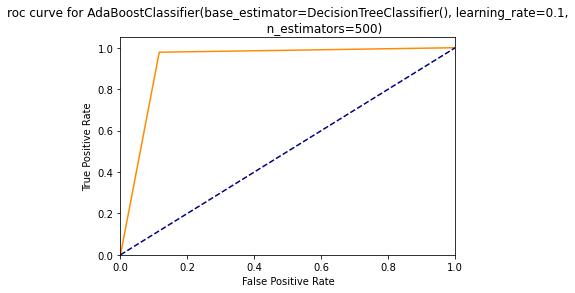


**************Area under the curve******************
0.9312196649882395


In [89]:
#score for adaboost classifier using training data
train_score(ab_b)

## Real and predicted value using different model

In [92]:
#Predected value
y_pred_sgd=sgd_b.predict(X_test_scaled)
y_pred_lr=lr_b.predict(X_test_scaled)
y_pred_svc=svc.predict(X_test_scaled)
y_pred_dt=dt_b.predict(X_test_scaled)
y_pred_rf=rf_b.predict(X_test_scaled)
y_pred_rt=rt_b.predict(X_test_scaled)
y_pred_ab=ab_b.predict(X_test_scaled)

In [93]:
df_pred=pd.DataFrame({'Real value':y_test,
                     'SGD Classifier':y_pred_sgd,
                     'Logistic Regression':y_pred_lr,
                     'SVC':y_pred_svc,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'AdaBoost':y_pred_ab})
df_pred.replace({1:'True', 0: 'False'}, inplace=True)
df_pred

,Real value,SGD Classifier,Logistic Regression,SVC,Decision Tree,Random Forest,Extra Random Tree,AdaBoost
0,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
5206,False,False,False,False,False,False,False,False
5207,False,False,False,False,True,False,False,True
5208,False,False,False,False,False,False,False,False
5209,False,True,True,True,False,True,True,True


In [158]:
df_pred.to_html('Resources/Cleaned_data/over_pred_test.html')

SGD Classifier
********************Train Score******************
0.8088658606793322

*********************Test Score******************
0.7963922471694492

**************Confusion Matrix******************
[[2265  375]
 [ 686 1885]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2640
           1       0.83      0.73      0.78      2571

    accuracy                           0.80      5211
   macro avg       0.80      0.80      0.80      5211
weighted avg       0.80      0.80      0.80      5211


ROC Curve


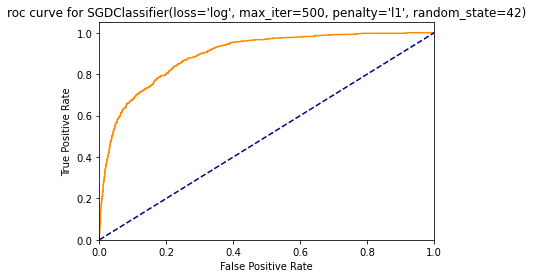


**************Area under the curve******************
0.8945005775373338
None
******************************

Logistic Regression
********************Train Score******************
0.8208277361990661

*********************Test Score******************
0.8034926117827672

**************Confusion Matrix******************
[[2215  425]
 [ 599 1972]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2640
           1       0.82      0.77      0.79      2571

    accuracy                           0.80      5211
   macro avg       0.80      0.80      0.80      5211
weighted avg       0.80      0.80      0.80      5211


ROC Curve


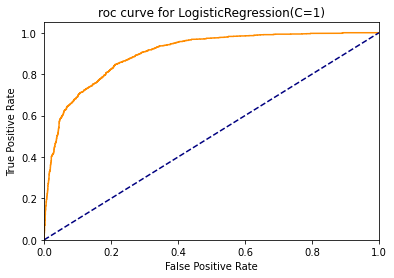


**************Area under the curve******************
0.9003220654620887
None
******************************

SVC
********************Train Score******************
0.8296552165291371

*********************Test Score******************
0.819804260218768

**************Confusion Matrix******************
[[2264  376]
 [ 563 2008]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2640
           1       0.84      0.78      0.81      2571

    accuracy                           0.82      5211
   macro avg       0.82      0.82      0.82      5211
weighted avg       0.82      0.82      0.82      5211


ROC Curve


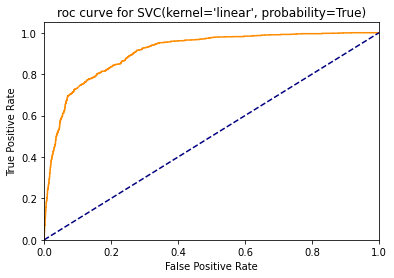


**************Area under the curve******************
0.9070727697040416
None
******************************

Decision Tree
********************Train Score******************
1.0

*********************Test Score******************
0.950681251199386

**************Confusion Matrix******************
[[2393  247]
 [  10 2561]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2640
           1       0.91      1.00      0.95      2571

    accuracy                           0.95      5211
   macro avg       0.95      0.95      0.95      5211
weighted avg       0.95      0.95      0.95      5211


ROC Curve


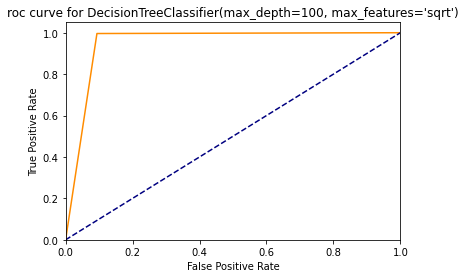


**************Area under the curve******************
0.9512749283971571
None
******************************

Random Forest
********************Train Score******************
0.9502974477067742

*********************Test Score******************
0.9241988102091729

**************Confusion Matrix******************
[[2347  293]
 [ 102 2469]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2640
           1       0.89      0.96      0.93      2571

    accuracy                           0.92      5211
   macro avg       0.93      0.92      0.92      5211
weighted avg       0.93      0.92      0.92      5211


ROC Curve


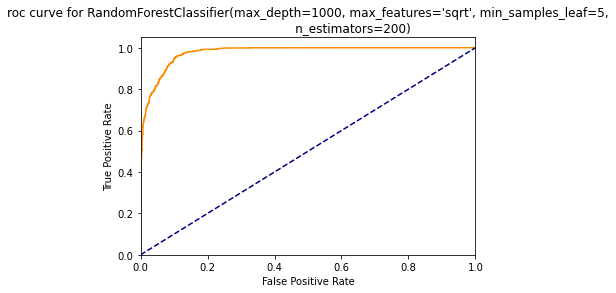


**************Area under the curve******************
0.9771632603750456
None
******************************

Extra Random Tree
********************Train Score******************
0.8886330198938144

*********************Test Score******************
0.8472462099405105

**************Confusion Matrix******************
[[2112  528]
 [ 268 2303]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2640
           1       0.81      0.90      0.85      2571

    accuracy                           0.85      5211
   macro avg       0.85      0.85      0.85      5211
weighted avg       0.85      0.85      0.85      5211


ROC Curve


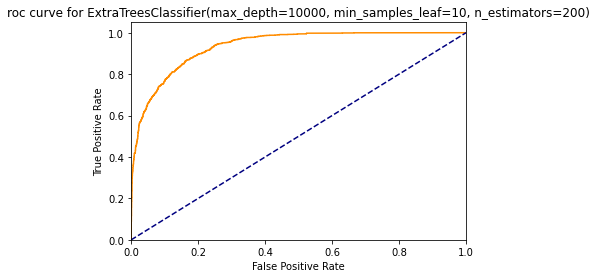


**************Area under the curve******************
0.9348087054913192
None
******************************

AdaBoost
********************Train Score******************
1.0

*********************Test Score******************
0.9430051813471503

**************Confusion Matrix******************
[[2364  276]
 [  21 2550]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2640
           1       0.90      0.99      0.94      2571

    accuracy                           0.94      5211
   macro avg       0.95      0.94      0.94      5211
weighted avg       0.95      0.94      0.94      5211


ROC Curve


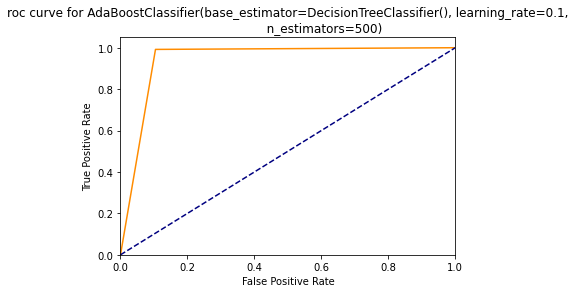


**************Area under the curve******************
0.943643258724939
None
******************************



In [96]:
# score for different models using test data
print('SGD Classifier')
print(test_score(sgd_b))
print("*"*30)
print('')

print('Logistic Regression')
print(test_score(lr_b))
print("*"*30)
print('')

print('SVC')
print(test_score(svc))
print("*"*30)
print('')

print('Decision Tree')
print(test_score(dt_b))
print("*"*30)
print('')

print('Random Forest')
print(test_score(rf_b))
print("*"*30)
print('')

print('Extra Random Tree')
print(test_score(rt_b))
print("*"*30)
print('')

print('AdaBoost')
print(test_score(ab_b))
print("*"*30)
print('')


In [106]:
#defining function for model scoring with test set
def model_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [108]:
#making dataframe on evaluation metrices
all_evaluation=pd.DataFrame({'SGD':model_score(sgd_b),
                            'logistic Reg':model_score(lr_b),
                            'svc':model_score(svc),
                            'Decision Tree':model_score(dt_b),
                           'Random Forest':model_score(rf_b),
                            'Extra Random Tree':model_score(rt_b),
                           'Ada Boost':model_score(ab_b),}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
train score,0.808866,0.820828,0.829655,1.000000,0.950297,0.888633,1.000000
test score,0.796392,0.803493,0.819804,0.950681,0.924199,0.847246,0.943005
precision_score,0.834071,0.822695,0.842282,0.912037,0.893917,0.813493,0.902335
recall_score,0.733178,0.767017,0.781019,0.996110,0.960327,0.895760,0.991832
f1_score,0.780377,0.793881,0.810494,0.952222,0.925933,0.852647,0.944969
auc,0.894501,0.900322,0.907073,0.951275,0.977163,0.934809,0.943643


In [156]:
all_evaluation.to_html('Resources/Cleaned_data/over_metrics.html')

## Trying to improve score by selecting important features based on Decision Tree


In [18]:
#selecting and fitting model
sel = SelectFromModel(dt)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [20]:
imp_feat=sel.get_support()
imp_feat

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [144]:
#splitting data using train_test split
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X_dummies), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [145]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
sgd_s_train=sgd_s.score(X_selected_train_scaled, y_train)
sgd_s_test=sgd_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {sgd_s_train}')
print(f'Testing Score: {sgd_s_test}')

Training Score: 0.8029808737926182
Testing Score: 0.8123200921128382


### Logistic Regression after selecting important features

In [146]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
lr_s_train=lr_s.score(X_selected_train_scaled, y_train)
lr_s_test=lr_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {lr_s_train}')
print(f'Testing Score: {lr_s_test}')

Training Score: 0.8100812384059362
Testing Score: 0.8199961619650739


### SVC after selecting important features

In [147]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear', probability=True).fit(X_selected_train_scaled, y_train)
svc_s_train=svc_s.score(X_selected_train_scaled, y_train)
svc_s_test=svc_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {svc_s_train}')
print(f'Testing Score: {svc_s_test}')

Training Score: 0.8041962515192221
Testing Score: 0.8142391095758972


### Decision Tree after selecting important features

In [148]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
dt_s_train=dt_s.score(X_selected_train_scaled, y_train)
dt_s_test=dt_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {dt_s_train}')
print(f'Testing Score: {dt_s_test}')

Training Score: 0.9988485895221646
Testing Score: 0.9430051813471503


### Random Forest after selecting important features

In [149]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
rf_s_train=rf_s.score(X_selected_train_scaled, y_train)
rf_s_test=rf_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {rf_s_train}')
print(f'Testing Score: {rf_s_test}')

Training Score: 0.9988485895221646
Testing Score: 0.9529840721550566


### Extra Random Tree after selecting important features

In [151]:
#after model selection
rt_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
rt_s_train=rt_s.score(X_selected_train_scaled, y_train)
rt_s_test=rt_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {rt_s_train}')
print(f'Testing Score: {rt_s_test}')

Training Score: 0.9988485895221646
Testing Score: 0.9518326616772212


In [152]:
#defining function for model scoring with test set
def model_imp_feat(model, X_train_scaled=X_selected_train_scaled, X_test_scaled=X_selected_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [153]:
#making dataframe on evaluation metrices
all_evaluation_imp_feat=pd.DataFrame({'SGD':model_imp_feat(sgd_s),
                            'logistic Reg':model_imp_feat(lr_s),
                            'svc':model_imp_feat(svc_s),
                            'Decision Tree':model_imp_feat(dt_s),
                           'Random Forest':model_imp_feat(rf_s),
                            'Extra Random Tree':model_imp_feat(rt_s)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation_imp_feat

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree
train score,0.802981,0.810081,0.804196,0.998849,0.998849,0.998849
test score,0.812320,0.819996,0.814239,0.943005,0.952984,0.951833
precision_score,0.887105,0.896451,0.900851,0.903123,0.918287,0.916307
recall_score,0.709615,0.717789,0.700272,0.990658,0.992993,0.992993
f1_score,0.788495,0.797233,0.787998,0.944867,0.954180,0.953110
auc,0.882016,0.882742,0.890834,0.943680,0.996680,0.996906


In [157]:
#saving the html table for website
all_evaluation_imp_feat.to_html('Resources/Cleaned_data/over_metrics_imp.html')

## Saving the best model

In [154]:
import joblib
joblib.dump(rf_s, 'model.pkl')

['model.pkl']

In [155]:
#saving standard scaler
joblib.dump(scaler1, 'scaler.pkl')

['scaler.pkl']